<a href="https://colab.research.google.com/github/ShawnLiu119/Fraud_Detection_Credit/blob/main/Dataset_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transaction Data Simulator**

The simulated datasets will highlight most of the issues that practitioners of fraud detection face using real-world data. In particular, they will include class imbalance (less than 1% of fraudulent transactions), a mix of numerical and categorical features (with categorical features involving a very large number of values), non-trivial relationships between features, and time-dependent fraud scenarios.

### Transaction Features

Our focus will be on the most essential features of a transaction. In essence, a payment card transaction consists of any amount paid to a merchant by a customer at a certain time. The six main features that summarise a transaction therefore are: <br>

The transaction ID: A unique identifier for the transaction<br>
The date and time: Date and time at which the transaction occurs<br>
The customer ID: The identifier for the customer. Each customer has a unique identifier<br>
The terminal ID: The identifier for the merchant (or more precisely the terminal). Each terminal has a unique identifier<br>
The transaction amount: The amount of the transaction.<br>
The fraud label: A binary variable, with the value 0 for a legitimate transaction, or the value 1 for a fraudulent transaction.<br>
These features will be referred to as TRANSACTION_ID, TX_DATETIME, CUSTOMER_ID, TERMINAL_ID, TX_AMOUNT, and TX_FRAUD.

The goal of the transaction data simulator will be to generate a table of transactions with these features. This table will be referred to as the labeled transactions table. Such a table is illustrated in Fig. 1.
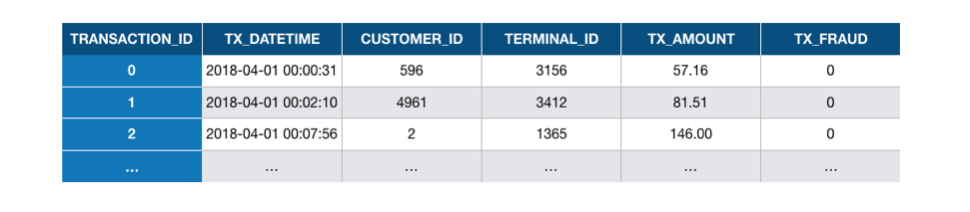

In [1]:
# Necessary imports for this notebook
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

### **Customer profiles generation**
Each customer will be defined by the following properties:

**CUSTOMER_ID**: The customer unique ID (x_customer_id,y_customer_id): A pair of real coordinates (x_customer_id,y_customer_id) in a 100 * 100 grid, that defines the **geographical location** of the customer

**(mean_amount, std_amount):** The mean and standard deviation of the transaction amounts for the customer, **assuming that the transaction amounts follow a normal distribution**. The mean_amount will be drawn from a uniform distribution (5,100) and the std_amount will be set as the mean_amount divided by two.

**mean_nb_tx_per_day**: The average number of transactions per day for the customer, assuming that the number of transactions per day follows a Poisson distribution. This number will be drawn from a uniform distribution (0,4).<br>
The generate_customer_profiles_table function provides an implementation for generating a table of customer profiles. It takes as input the number of customers for which to generate a profile and a random state for reproducibility. It returns a DataFrame containing the properties for each customer.

#### Transaction generation process
The simulation will consist of five main steps:

1. Generation of customer profiles: <br>
Every customer is different in their spending habits. This will be simulated by defining some properties for each customer. The main properties will be their **geographical location, their spending frequency, and their spending amounts**. The customer properties will be represented as a table, referred to as the customer profile table.

2. Generation of terminal profiles: <br>
Terminal properties will simply consist of a geographical location. The terminal properties will be represented as a table, referred to as the terminal profile table.

3. Association of customer profiles to terminals: <br>
**We will assume that customers only make transactions on terminals that are within a radius of of their geographical locations**. This makes the simple assumption that a customer only makes transactions on terminals that are geographically close to their location. This step will consist of adding a feature 'list_terminals' to each customer profile, that contains the set of terminals that a customer can use.

4. Generation of transactions: <br>
The simulator will loop over the set of customer profiles, and generate transactions according to their properties (spending frequencies and amounts, and available terminals). This will result in a table of transactions.
Generation of fraud scenarios: This last step will label the transactions as legitimate or genuine. This will be done by following three different fraud scenarios.
The transaction generation process is illustrated below.

In [4]:
def generate_customer_profiles_table(n_customers, random_state=0):

    np.random.seed(random_state)

    customer_id_properties=[]

    # Generate customer properties from random distributions
    for customer_id in range(n_customers):

        x_customer_id = np.random.uniform(0,100)
        y_customer_id = np.random.uniform(0,100)

        mean_amount = np.random.uniform(10,500) # Arbitrary (but sensible) value --> credit transaction
        std_amount = mean_amount/2 # Arbitrary (but sensible) value

        mean_nb_tx_per_day = np.random.uniform(0,4) # Arbitrary (but sensible) value

        customer_id_properties.append([customer_id,
                                      x_customer_id, y_customer_id,
                                      mean_amount, std_amount,
                                      mean_nb_tx_per_day])

    customer_profiles_table = pd.DataFrame(customer_id_properties, columns=['CUSTOMER_ID',
                                                                      'x_customer_id', 'y_customer_id',
                                                                      'mean_amount', 'std_amount',
                                                                      'mean_nb_tx_per_day'])

    return customer_profiles_table

In [5]:
n_customers = 5
customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day
0,0,54.881350,71.518937,305.354054,152.677027,2.179533
1,1,42.365480,64.589411,224.417734,112.208867,3.567092
2,2,96.366276,38.344152,397.945269,198.972634,2.115580
3,3,56.804456,92.559664,44.807669,22.403834,0.348517
4,4,2.021840,83.261985,391.296808,195.648404,3.480049


### **Terminal Profiles Generation**

Each terminal will be defined by the following properties:

TERMINAL_ID: The terminal ID
(x_terminal_id,y_terminal_id): A pair of real coordinates (x_terminal_id,y_terminal_id) in a 100 * 100 grid, that defines the geographical location of the terminal
The generate_terminal_profiles_table function provides an implementation for generating a table of terminal profiles. It takes as input the number of terminals for which to generate a profile and a random state for reproducibility. It returns a DataFrame containing the properties for each terminal.

In [6]:
def generate_terminal_profiles_table(n_terminals, random_state=0):

    np.random.seed(random_state)

    terminal_id_properties=[]

    # Generate terminal properties from random distributions
    for terminal_id in range(n_terminals):

        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)

        terminal_id_properties.append([terminal_id,
                                      x_terminal_id, y_terminal_id])

    terminal_profiles_table = pd.DataFrame(terminal_id_properties, columns=['TERMINAL_ID',
                                                                      'x_terminal_id', 'y_terminal_id'])

    return terminal_profiles_table

In [7]:
n_terminals = 5
terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 0)
terminal_profiles_table

,TERMINAL_ID,x_terminal_id,y_terminal_id
0,0,54.881350,71.518937
1,1,60.276338,54.488318
2,2,42.365480,64.589411
3,3,43.758721,89.177300
4,4,96.366276,38.344152


### **Association of customer profiles to terminals**

**In our design, customers can only perform transactions on terminals that are within a radius of r of their geographical locations.**

Let us first write a function, called get_list_terminals_within_radius, which finds these terminals for a customer profile. The function will take as input a customer profile (any row in the customer profiles table), an array that contains the geographical location of all terminals, and the radius r. It will return the list of terminals within a radius of r for that customer.

In [37]:
def get_list_terminals_within_radius(customer_profile, x_y_terminals, r):

    # Use numpy arrays in the following to speed up computations

    # Location (x,y) of customer as numpy array
    x_y_customer = customer_profile[['x_customer_id','y_customer_id']].values.astype(float)

    # Squared difference in coordinates between customer and terminal locations
    squared_diff_x_y = np.square(x_y_customer - x_y_terminals)

    # Sum along rows and compute suared root to get distance
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))

    # Get the indices of terminals which are at a distance less than r
    available_terminals = list(np.where(dist_x_y<r)[0])

    # Return the list of terminal IDs
    return available_terminals

In [38]:

# We first get the geographical locations of all terminals as a numpy array
x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
# And get the list of terminals within radius of $50$ for the last customer
get_list_terminals_within_radius(customer_profiles_table.iloc[4], x_y_terminals=x_y_terminals, r=50) #all customer

[2, 3]

In [16]:
#test
row = customer_profiles_table.iloc[4]
x_y_customer = row[['x_customer_id','y_customer_id']].values.astype(float)
x_y_customer

array([ 2.02183974, 83.26198455])

In [11]:
x_y_terminals

array([[54.88135039, 71.51893664],
       [60.27633761, 54.4883183 ],
       [42.36547993, 64.58941131],
       [43.75872113, 89.17730008],
       [96.36627605, 38.34415188]])

In [15]:
squared_diff_x_y = np.square(x_y_customer - x_y_terminals)
squared_diff_x_y

array([[2794.12786602,  137.89917439],
       [3393.58652129,  827.92386976],
       [1627.60930377,  348.66499171],
       [1741.96726751,   34.99095774],
       [8900.87266191, 2017.61169197]])

For better visualization, let us plot

The locations of all terminals (in red)

The location of the last customer (in blue)

The region within radius of 50 of the first customer (in green)

In [39]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(terminal_profiles_table.x_terminal_id.values,
           terminal_profiles_table.y_terminal_id.values,
           color='blue', label = 'Locations of terminals')

# Plot location of the last customer
customer_id=4
ax.scatter(customer_profiles_table.iloc[customer_id].x_customer_id,
           customer_profiles_table.iloc[customer_id].y_customer_id,
           color='red',label="Location of last customer")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((customer_profiles_table.iloc[customer_id].x_customer_id,
                   customer_profiles_table.iloc[customer_id].y_customer_id), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Green circle: \n Terminals within a radius of 50 \n of the last customer")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])

ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

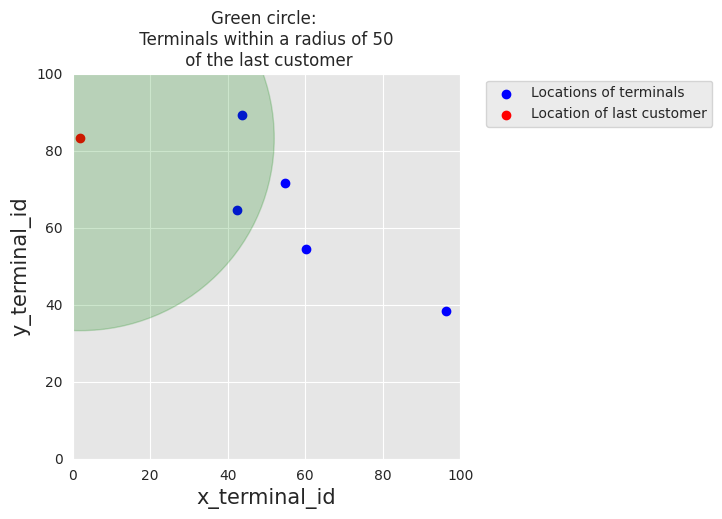

In [40]:
terminals_available_to_customer_fig

In [41]:
customer_profiles_table['available_terminals']=customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=50), axis=1) #x represent each row
customer_profiles_table

,CUSTOMER_ID,x_customer_id,y_customer_id,mean_amount,std_amount,mean_nb_tx_per_day,available_terminals
0,0,54.881350,71.518937,305.354054,152.677027,2.179533,"[0, 1, 2, 3]"
1,1,42.365480,64.589411,224.417734,112.208867,3.567092,"[0, 1, 2, 3]"
2,2,96.366276,38.344152,397.945269,198.972634,2.115580,"[1, 4]"
3,3,56.804456,92.559664,44.807669,22.403834,0.348517,"[0, 1, 2, 3]"
4,4,2.021840,83.261985,391.296808,195.648404,3.480049,"[2, 3]"


### **Generation of transactions**
The customer profiles now contain all the information that we require to generate transactions. The transaction generation will be done by a function generate_transactions_table that takes as input a customer profile, a starting date, and a number of days for which to generate transactions. It will return a table of transactions, which follows the format presented above (without the transaction label, which will be added in fraud scenarios generation).

In [42]:
def generate_transactions_table(customer_profile, start_date = "2018-04-01", nb_days = 10):

    customer_transactions = []

    random.seed(int(customer_profile.CUSTOMER_ID))
    np.random.seed(int(customer_profile.CUSTOMER_ID))

    # For all days
    for day in range(nb_days):

        # Random number of transactions for that day
        nb_tx = np.random.poisson(customer_profile.mean_nb_tx_per_day) #lambda as mean

        # If nb_tx positive, let us generate transactions
        if nb_tx>0:

            for tx in range(nb_tx):

                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that
                # most transactions occur during the day. 中午12点，往前往后各6个小时
                time_tx = int(np.random.normal(86400/2, 20000))

                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_tx>0) and (time_tx<86400):

                    # Amount is drawn from a normal distribution
                    amount = np.random.normal(customer_profile.mean_amount, customer_profile.std_amount)

                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,customer_profile.mean_amount*2)

                    amount=np.round(amount,decimals=2)

                    if len(customer_profile.available_terminals)>0:

                        terminal_id = random.choice(customer_profile.available_terminals) #从availabe的terminal id任选1个terminal

                        customer_transactions.append([time_tx+day*86400, day,
                                                      customer_profile.CUSTOMER_ID,
                                                      terminal_id, amount])

    customer_transactions = pd.DataFrame(customer_transactions, columns=['TX_TIME_SECONDS', 'TX_TIME_DAYS', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT'])

    if len(customer_transactions)>0:
        customer_transactions['TX_DATETIME'] = pd.to_datetime(customer_transactions["TX_TIME_SECONDS"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TX_DATETIME','CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT','TX_TIME_SECONDS', 'TX_TIME_DAYS']]

    return customer_transactions

In [45]:
transaction_table_customer_0=generate_transactions_table(customer_profiles_table.iloc[0],
                                                         start_date = "2018-04-01",
                                                         nb_days = 5)
transaction_table_customer_0

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,3,606.12,26345,0
1,2018-04-01 19:02:02,0,3,228.12,68522,0
2,2018-04-01 18:00:16,0,0,379.30,64816,0
3,2018-04-02 15:13:02,0,2,158.67,141182,1
4,2018-04-02 14:05:38,0,3,310.46,137138,1
5,2018-04-02 15:46:51,0,3,66.64,143211,1
6,2018-04-02 08:51:06,0,2,268.38,118266,1
7,2018-04-02 20:24:47,0,3,254.50,159887,1
8,2018-04-03 12:15:47,0,2,578.26,216947,2
9,2018-04-03 08:50:09,0,1,332.13,204609,2


We can make a quick check that the generated transactions follow the customer profile properties:

The terminal IDs are indeed those in the list of available terminals (0, 1, 2 and 3)
The transaction amounts seem to follow the amount parameters of the customer (mean_amount=62.26 and std_amount=31.13)
The number of transactions per day varies according to the transaction frequency parameters of the customer (mean_nb_tx_per_day=2.18).

In [59]:
transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df

,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,2018-04-01 07:19:05,0,3,606.12,26345,0
1,2018-04-01 19:02:02,0,3,228.12,68522,0
2,2018-04-01 18:00:16,0,0,379.30,64816,0
3,2018-04-02 15:13:02,0,2,158.67,141182,1
4,2018-04-02 14:05:38,0,3,310.46,137138,1
...,...,...,...,...,...,...
60,2018-04-05 07:41:19,4,2,552.20,373279,4
61,2018-04-05 06:59:59,4,3,398.39,370799,4
62,2018-04-05 17:23:34,4,2,263.99,408214,4
63,2018-04-05 12:51:38,4,2,180.68,391898,4


### Scaling up to a larger dataset

take as inputs the number of desired customers, terminals and days, as well as the starting date and the radius r
return the generated customer and terminal profiles table, and the DataFrame of transactions.
{note}
In order to speed up the computations, one can use the `parallel_apply` function of the `pandarallel` module. This function replaces the panda `apply` function, and allows the distribution of the computation on all the available CPUs.

In [61]:
pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.4 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16673 sha256=39698fa48dd74db9017ddba32ba37a115543cd89d99a1e12b10697e4724d1ff1
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


In [62]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [115]:
def generate_dataset(n_customers = 10000, n_terminals = 1000000, nb_days=90, start_date="2018-04-01", r=5):

    start_time=time.time()
    customer_profiles_table = generate_customer_profiles_table(n_customers, random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    terminal_profiles_table = generate_terminal_profiles_table(n_terminals, random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    x_y_terminals = terminal_profiles_table[['x_terminal_id','y_terminal_id']].values.astype(float)
    # customer_profiles_table['available_terminals'] = customer_profiles_table.apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)

    # With Pandarallel
    customer_profiles_table['available_terminals'] = customer_profiles_table.parallel_apply(lambda x : get_list_terminals_within_radius(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    customer_profiles_table['nb_terminals']=customer_profiles_table.available_terminals.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))

    start_time=time.time()
    # transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    # With Pandarallel
    transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))

    # Sort transactions chronologically
    transactions_df=transactions_df.sort_values('TX_DATETIME')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    # TRANSACTION_ID are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)

    return (customer_profiles_table, terminal_profiles_table, transactions_df)


Let us generate a dataset that features

5000 customers
10000 terminals
183 days of transactions (which corresponds to a simulated period from 2018/04/01 to 2018/09/30)
The starting date is arbitrarily fixed at 2018/04/01. The radius
 is set to 5, which corresponds to around 100 available terminals for each customer.

In [123]:
(customer_profiles_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000,
                     n_terminals = 10000,
                     nb_days=183,
                     start_date="2018-04-01",
                     r=5)

Time to generate customer profiles table: 0.064s
Time to generate terminal profiles table: 0.07s


Time to associate terminals to customers: 7.1s


Time to generate transactions: 1.5e+02s


In [117]:
transactions_df.shape

(1754155, 7)

In [118]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
0,0,2018-04-01 00:00:31,596,3156,272.96,31,0
1,1,2018-04-01 00:02:10,4961,3412,405.37,130,0
2,2,2018-04-01 00:07:56,2,1365,724.31,476,0
3,3,2018-04-01 00:09:29,4128,8737,314.37,569,0
4,4,2018-04-01 00:10:34,927,9906,248.53,634,0


In [119]:
%%capture

distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_AMOUNT'].sample(n=10000).values
time_val = transactions_df[transactions_df.TX_TIME_DAYS<10]['TX_TIME_SECONDS'].sample(n=10000).values #everyday, the highest number of transaction aroudn noon, mean of normal distribution

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribution of transaction amounts', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Amount", ylabel="Number of transactions")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribution of transaction times', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Time (days)", ylabel="Number of transactions")

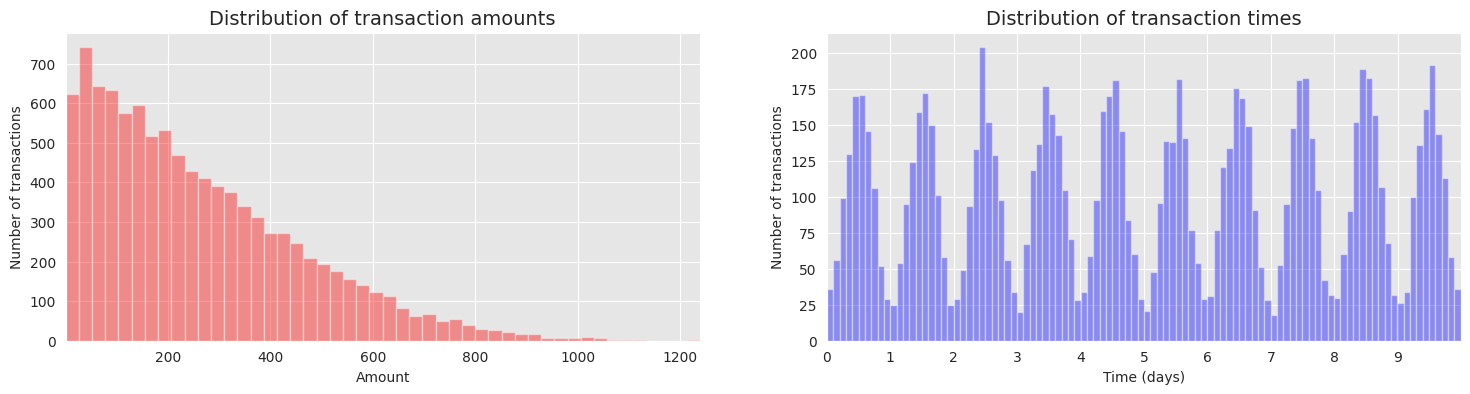

In [120]:
distribution_amount_times_fig

The distribution of transaction amounts has most of its mass for small amounts. The distribution of transaction times follows a gaussian distribution on a daily basis, centered around noon

### **Fraud scenario generation**

Scenario 1: Any transaction whose **amount** is more than xxx is a fraud. This scenario is not inspired by a real-world scenario. Rather, it will provide an obvious fraud pattern that should be detected by any baseline fraud detector. This will be useful to validate the implementation of a fraud detection technique.<br>

Scenario 2: Every day, a list of two **terminals** is drawn at random. All transactions on these terminals in the next 28 days will be marked as fraudulent. This scenario simulates a **criminal use of a terminal**, through phishing for example. Detecting this scenario will be possible by adding features that keep track of the number of fraudulent transactions on the terminal. Since the terminal is only compromised for 28 days, additional strategies that involve concept drift will need to be designed to efficiently deal with this scenario.<br>

Scenario 3: Every day, a list of 3 customers is drawn at random. In the next 14 days, 1/3 of their transactions have their **amount**s multiplied by 5 and marked as fraudulent. This scenario simulates a card-not-present fraud where the **credentials of a customer have been leaked**. The customer continues to make transactions, and transactions of higher values are made by the fraudster who tries to maximize their gains. Detecting this scenario will require adding features that keep track of the spending habits of the customer. As for scenario 2, since the card is only temporarily compromised, additional strategies that involve concept drift should also be designed.<br>

In [124]:
def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):

    # By default, all transactions are genuine
    transactions_df['TX_FRAUD']=0
    transactions_df['TX_FRAUD_SCENARIO']=0

    # Scenario 1
    transactions_df.loc[transactions_df.TX_AMOUNT>1000, 'TX_FRAUD']=1
    transactions_df.loc[transactions_df.TX_AMOUNT>1000, 'TX_FRAUD_SCENARIO']=1
    nb_frauds_scenario_1=transactions_df.TX_FRAUD.sum()
    print("Number of frauds from scenario 1: "+str(nb_frauds_scenario_1))

    # Scenario 2
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_terminals = terminal_profiles_table.TERMINAL_ID.sample(n=2, random_state=day)

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+28) &
                                                    (transactions_df.TERMINAL_ID.isin(compromised_terminals))]

        transactions_df.loc[compromised_transactions.index,'TX_FRAUD']=1
        transactions_df.loc[compromised_transactions.index,'TX_FRAUD_SCENARIO']=2

    nb_frauds_scenario_2=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_1
    print("Number of frauds from scenario 2: "+str(nb_frauds_scenario_2))

    # Scenario 3
    for day in range(transactions_df.TX_TIME_DAYS.max()):

        compromised_customers = customer_profiles_table.CUSTOMER_ID.sample(n=3, random_state=day).values

        compromised_transactions=transactions_df[(transactions_df.TX_TIME_DAYS>=day) &
                                                    (transactions_df.TX_TIME_DAYS<day+14) &
                                                    (transactions_df.CUSTOMER_ID.isin(compromised_customers))]

        nb_compromised_transactions=len(compromised_transactions)


        random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))

        transactions_df.loc[index_fauds,'TX_AMOUNT']=transactions_df.loc[index_fauds,'TX_AMOUNT']*5
        transactions_df.loc[index_fauds,'TX_FRAUD']=1
        transactions_df.loc[index_fauds,'TX_FRAUD_SCENARIO']=3


    nb_frauds_scenario_3=transactions_df.TX_FRAUD.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Number of frauds from scenario 3: "+str(nb_frauds_scenario_3))

    return transactions_df

In [125]:
%time transactions_df = add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df)

Number of frauds from scenario 1: 3175
Number of frauds from scenario 2: 9087
Number of frauds from scenario 3: 4598
CPU times: user 2min 17s, sys: 418 ms, total: 2min 17s
Wall time: 2min 18s


In [126]:
transactions_df.TX_FRAUD.mean() #high imbalanced data

0.00961146534941325

In [127]:
transactions_df.TX_FRAUD.sum()

16860

A total of 13719 transactions were marked as fraudulent. This amounts to 0.78% of the transactions.

In [103]:
transactions_df.head()

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2018-04-01 00:00:31,596,3156,272.96,31,0,0,0
1,1,2018-04-01 00:02:10,4961,3412,405.37,130,0,0,0
2,2,2018-04-01 00:07:56,2,1365,724.31,476,0,0,0
3,3,2018-04-01 00:09:29,4128,8737,314.37,569,0,0,0
4,4,2018-04-01 00:10:34,927,9906,248.53,634,0,0,0


In [128]:
#check how the number of transactions, the number of fraudulent transactions, and the number of compromised cards vary on a daily basis

def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TX_FRAUD']>0].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()

    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

In [129]:
transactions_df[(transactions_df['TX_TIME_DAYS']==0) & (transactions_df['TX_FRAUD'] ==1)]

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
1033,1033,2018-04-01 05:36:35,64,7901,1009.13,20195,0,1,1
2090,2090,2018-04-01 07:54:05,3702,7626,1011.32,28445,0,1,1
3527,3527,2018-04-01 10:17:43,3774,3059,1126.37,37063,0,1,1
3970,3970,2018-04-01 10:55:29,3772,4764,1068.46,39329,0,1,1
4484,4484,2018-04-01 11:39:16,4526,5245,1050.31,41956,0,1,1
5790,5790,2018-04-01 13:31:48,4944,6050,1108.10,48708,0,1,1
6549,6549,2018-04-01 14:42:02,4625,9102,1130.80,52922,0,1,1
6896,6896,2018-04-01 15:18:09,3535,1318,1032.01,55089,0,1,1
7975,7975,2018-04-01 17:16:08,4645,2172,1089.34,62168,0,1,1
8674,8674,2018-04-01 19:06:47,4646,5321,1078.18,68807,0,1,1


In [131]:
tx_stats[['value', 'stat_type']]

,value,stat_type
0,189.76,nb_tx_per_day
1,191.66,nb_tx_per_day
2,194.94,nb_tx_per_day
3,190.60,nb_tx_per_day
4,193.02,nb_tx_per_day
...,...,...
544,101.00,nb_fraudcard_per_day
545,83.00,nb_fraudcard_per_day
546,78.00,nb_fraudcard_per_day
547,84.00,nb_fraudcard_per_day


In [133]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf() #Get the current figure.

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TX_TIME_DAYS", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total transactions, and number of fraudulent transactions \n and number of compromised cards per day', fontsize=20)
sns_plot.set(xlabel = "Number of days since beginning of data generation", ylabel="Number")

sns_plot.set_ylim([0,300])

labels_legend = ["# transactions per day (/50)", "# fraudulent txs per day", "# fraudulent cards per day"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

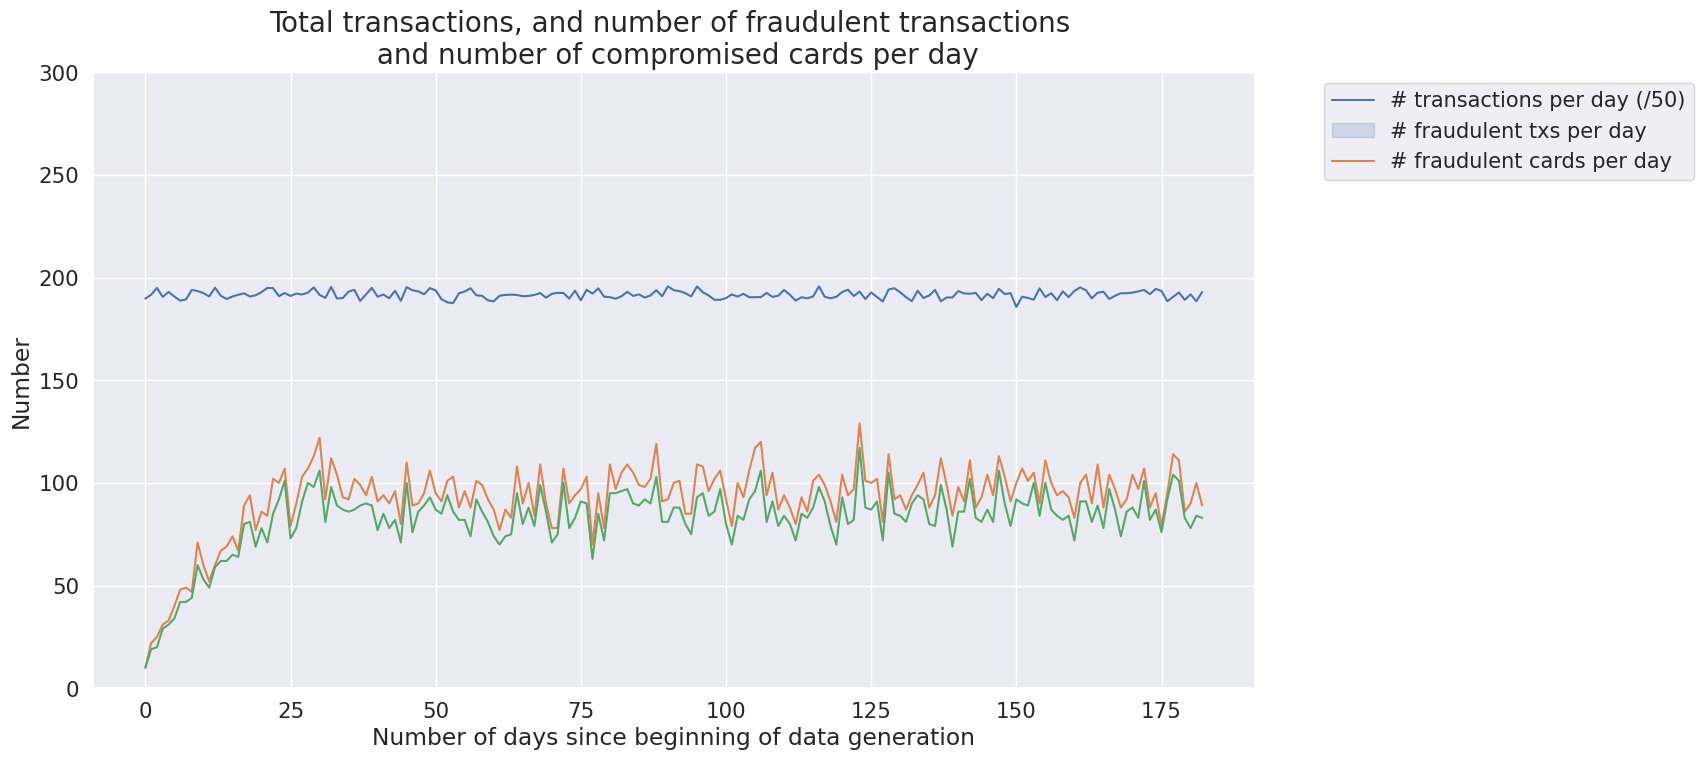

In [134]:
fraud_and_transactions_stats_fig

### **Save dataset**

Instead of saving the whole transaction dataset, we split the dataset into daily batches. This will allow later the loading of specific periods instead of the whole dataset. The pickle format is used, rather than CSV, to speed up the loading times. All files are saved in the DIR_OUTPUT folder. The names of the files are the dates, with the .pkl extension.

In [135]:
DIR_OUTPUT = "./simulated-data-raw/"

if not os.path.exists(DIR_OUTPUT):
    os.makedirs(DIR_OUTPUT)

start_date = datetime.datetime.strptime("2018-04-01", "%Y-%m-%d")

for day in range(transactions_df.TX_TIME_DAYS.max()+1):

    transactions_day = transactions_df[transactions_df.TX_TIME_DAYS==day].sort_values('TX_TIME_SECONDS')

    date = start_date + datetime.timedelta(days=day)
    filename_output = date.strftime("%Y-%m-%d")+'.pkl'

    # Protocol=4 required for Google Colab
    transactions_day.to_pickle(DIR_OUTPUT+filename_output, protocol=4)

In [136]:
!zip -r /content/rawdata.zip /content/simulated-data-raw/

  adding: content/simulated-data-raw/ (stored 0%)
  adding: content/simulated-data-raw/2018-07-26.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-06-01.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-05-11.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-07-06.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-07-15.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-04-25.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-04-13.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-05-28.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-07-03.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-05-06.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-06-09.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-08-21.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-05-03.pkl (deflated 72%)
  adding: content/simulated-data-raw/2018-07-13.pkl (deflated 72%)
  adding: co